In [2]:
%pylab inline
from numba import njit
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


In [6]:
num_iter = 50

@njit
def mandel(c):
    z = 0
    n = 0
    
    while abs(z) <= 2 and n < num_iter:
        z = z*z + c
        n += 1
        
    if n == num_iter:
        return num_iter
    
    return n + 1 - np.log(np.log2(abs(z)))

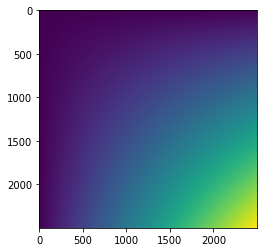

In [15]:
x_vec = np.linspace(0, width, num=width).reshape(width,1)
y_vec = np.linspace(0, height, num=height).reshape(1,height)
image_mat = matmul(x_vec, y_vec)

plt.imshow(image_mat)

In [29]:
%%time
re_i = -1.55
re_f = -1.5

im_i = -0.05
im_f = 0.05

height=2500
width=2500

image_mandel = np.zeros((width, height))

for x in (t := trange(width)):
    for y in range(height):
        c = complex(re_i + (x / width) * (re_f - re_i), im_i + (y / height) * (im_f - im_i))
        image_mandel[x][y] = 255 - int(255 * mandel(c)/num_iter)

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:07<00:00, 331.05it/s]

Wall time: 7.56 s


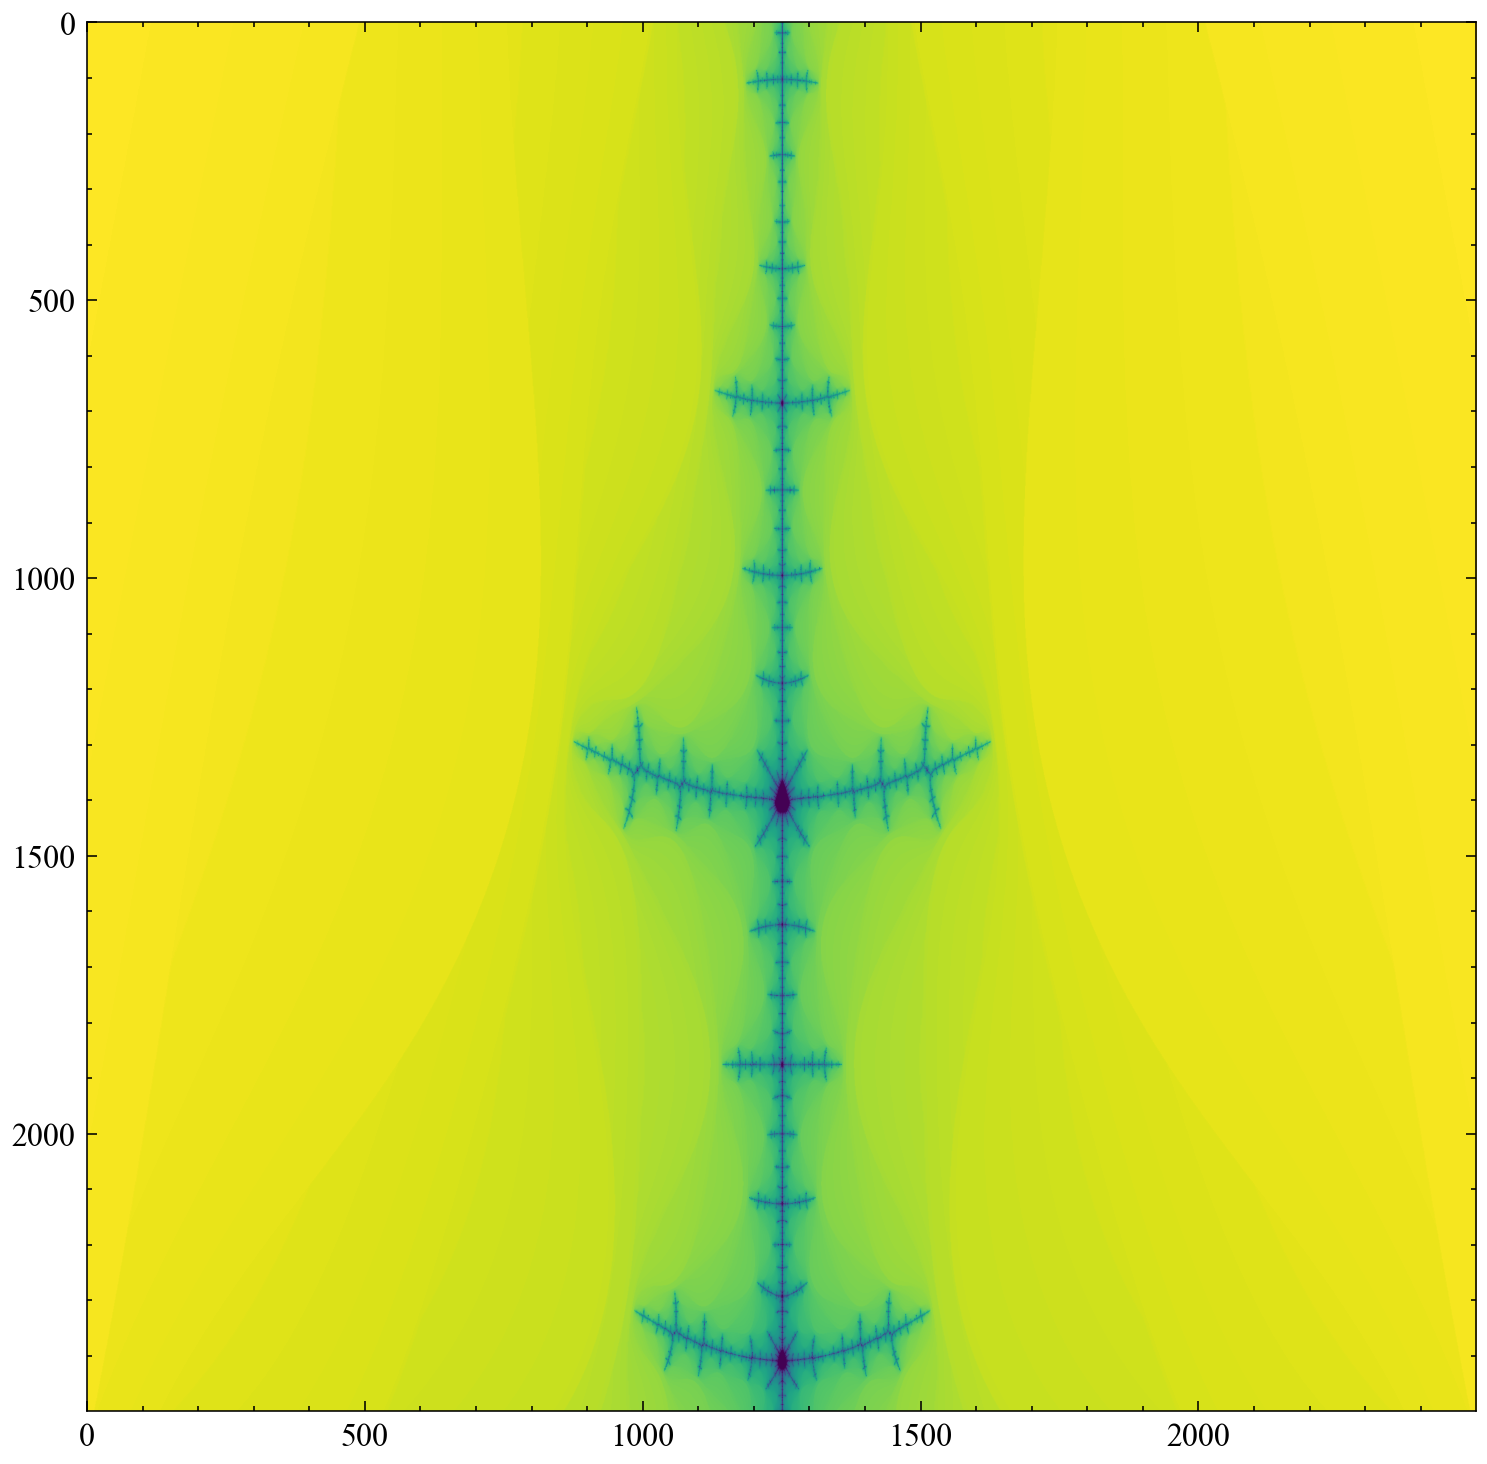

In [31]:
plt.figure(dpi=230, figsize=(8,8))
plt.style.use(['science', 'no-latex'])

plt.imshow(image_mandel)

plt.show()